In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [194]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
    #print("original sample: ", x,", its size: ",sample_size, "\n")
    array_of_samples = np.array([np.random.choice(x,sample_size,replace=True) for _ in range(n_bootstraps)])
    #print("bootstraps : \n ",array_of_samples)
    data_mean = np.mean(array_of_samples)
    #print("Mean of the data : ",data_mean,"\n")
    mean_of_each_bootstrap = np.array(np.mean(array_of_samples,axis=1))
    #print("Means of each bootstrap : ", sorted(mean_of_each_bootstrap))
    confidence_interval = 0.95
    p = ((1-confidence_interval)/2)*100
    lower = np.percentile(mean_of_each_bootstrap,p)
    #print(lower,"\n")
    p = (confidence_interval+((1-confidence_interval)/2))*100
    upper = np.percentile(mean_of_each_bootstrap,p)
    #print(upper)
    return data_mean,lower,upper

#bootstrap_mean(data, len(data), 10)

   Bootstrap Iterations       Mean  Value
0                   100   9.047143   mean
1                   100   6.500000  lower
2                   100  11.394643  upper
3                  1100   9.181364   mean
4                  1100   6.500000  lower
5                  1100  12.108929  upper


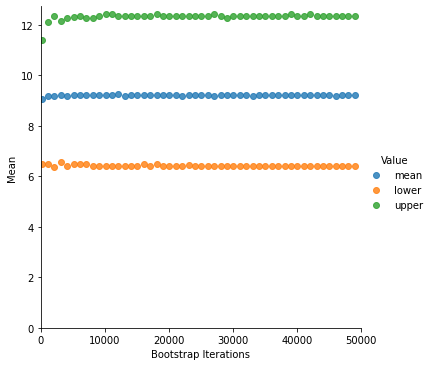

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
print(df_boot.head(6))
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
sns_plot.set_titles("95% confidence interval for means")



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
    array_of_samples = np.array([np.random.choice(sample,sample_size,replace=True) for _ in range(n_bootstraps)])
    data_mean = np.mean(array_of_samples)
    mean_of_each_bootstrap = np.array(np.mean(array_of_samples,axis=1))
    confidence_interval = ci/100
    p = ((1-confidence_interval)/2)*100
    lower = np.percentile(mean_of_each_bootstrap,p)
    p = (confidence_interval+((1-confidence_interval)/2))*100
    upper = np.percentile(mean_of_each_bootstrap,p)
    return data_mean,lower,upper


(0.0, 50000.0)

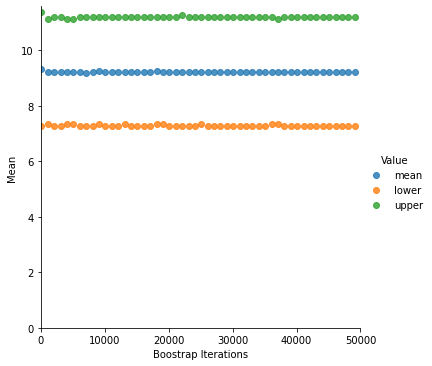

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


In [ ]:
## Slightly modifying the above bootstrap function sothat 
## we can calculate the confidence interval for any gven teststatistic like mean, median, standard deviation and variance.
def bootstrap_mean_general(sample, sample_size, n_bootstraps, ci, test_statistic):
    array_of_samples = np.array([np.random.choice(sample,sample_size,replace=True) for _ in range(n_bootstraps)])
    confidence_interval = ci/100
    p1 = ((1-confidence_interval)/2)*100
    p2 = (confidence_interval+((1-confidence_interval)/2))*100
    if test_statistic == 'mean':
      data_mean = np.mean(array_of_samples)
      mean_of_each_bootstrap = np.array(np.mean(array_of_samples,axis=1))
      lower = np.percentile(mean_of_each_bootstrap,p1)
      upper = np.percentile(mean_of_each_bootstrap,p2)
    elif test_statistic == 'median':
      data_median = np.median(array_of_samples)
      median_of_each_bootstrap = np.array(np.median(array_of_samples,axis=1))
      lower = np.percentile(median_of_each_bootstrap,p1)
      upper = np.percentile(median_of_each_bootstrap,p2)
    elif test_statistic == 'standard deviation':
      data_std_dev = np.std(array_of_samples)
      std_dev_of_each_bootstrap = np.array(np.std(array_of_samples,axis=1))
      lower = np.percentile(std_dev_of_each_bootstrap,p1)
      upper = np.percentile(std_dev_of_each_bootstrap,p2)
    elif test_statistic == 'variance':
      data_var = np.var(array_of_samples)
      var_of_each_bootstrap = np.array(np.var(array_of_samples,axis=1))
      lower = np.percentile(var_of_each_bootstrap,p1)
      upper = np.percentile(var_of_each_bootstrap,p2)
    else:
      print("Enter either mean, median, standard deviation or variance to find the confidence intervals")
    return lower,upper


In [196]:
#The 95% confidence interval for the mean of the customers dataset using 10000 iterations
conf_interval = bootstrap_mean_general(data, len(data), 10000, 95, 'mean')
print("The 95% confidence interval for the mean of the customers dataset using 10000 iterations: ",conf_interval)

The 95% confidence interval for the mean of the customers dataset using 10000 iterations:  (6.428571428571429, 12.357142857142858)


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [186]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
vehicles_df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")
vehicles_df.info()
#print(vehicles_df.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


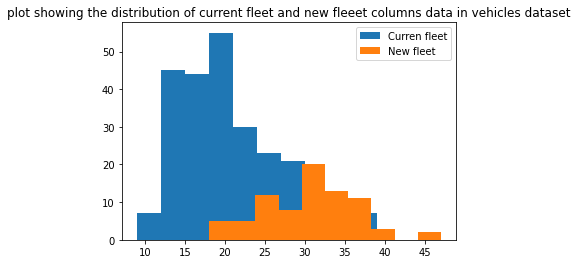

In [187]:
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
plt.hist(vehicles_df['Current fleet'],label='Curren fleet')
plt.hist(vehicles_df['New Fleet'],label='New fleet')
plt.legend()
plt.title('plot showing the distribution of current fleet and new fleeet columns data in vehicles dataset')
plt.show()
#plt.savefig('storetype.png')
# Note: you can add more cells as needed to organise your code and your plots

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [199]:
new_fleet_notnull_indices = pd.Series.notnull(vehicles_df['New Fleet'])
New_fleet = np.array(vehicles_df['New Fleet'][new_fleet_notnull_indices])

Current_fleet = np.array(vehicles_df['Current fleet'])

print("length of current fleet : ", len(Current_fleet))
print("length of New fleet : ", len(New_fleet))
t_observed = np.mean(New_fleet) - np.mean(Current_fleet) 

print("Mean of Currene Fleet : ", np.mean(Current_fleet))
print("Mean of New Fleet : ",np.mean(New_fleet))
print("Observed diffrence in means: ", t_observed,"\n")

Current_fleet_interval =  bootstrap_mean_general(Current_fleet, len(Current_fleet), 10000, 95,'mean')
New_fleet_interval     =  bootstrap_mean_general(New_fleet, len(New_fleet), 10000, 95,'mean')
New_fleet_80 =  bootstrap_mean_general(New_fleet, len(New_fleet), 10000, 80,'mean')
print("80% ci of the mean of new fleet",New_fleet_80)
#The 95% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is 
pp1 =  bootstrap_mean_general(New_fleet, len(New_fleet), 10000, 95,'standard deviation')
#The 99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is 
pp2 =  bootstrap_mean_general(Current_fleet, len(Current_fleet), 10000, 99,'standard deviation')

print("95% CI of the mean of the current fleet:", Current_fleet_interval)
print("95% CI of the mean of the new fleet :", New_fleet_interval )
print("95% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is: ",pp1)
print("99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is: ",pp2)

length of current fleet :  249
length of New fleet :  79
Mean of Currene Fleet :  20.14457831325301
Mean of New Fleet :  30.481012658227847
Observed diffrence in means:  10.336434344974837 

80% ci of the mean of new fleet (29.620253164556964, 31.354430379746834)
95% CI of the mean of the current fleet: (19.3574297188755, 20.943775100401606)
95% CI of the mean of the new fleet : (29.11392405063291, 31.84841772151898)
95% confidence interval for the standard deviation of the new fleet in the vehicles dataset using 10000 iterations is:  (5.141783213926835, 6.896773034442802)
99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is:  (5.6141811955754815, 7.101265609618027)


In [220]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    observed =  np.mean(sample2)- np.mean(sample1)
    sample1_size = len(sample1)
    combined_samples = np.concatenate([sample1, sample2])
   
    count = 0
    for i in range(n_permutations):
      perm = np.random.permutation(combined_samples)
      #print("permutated: ",perm)
      sample1_new = np.array(perm[:sample1_size])
      #print("sample1_new: ",sample1_new)
      sample2_new = np.array(perm[sample1_size:])
      #print("sample2_new : ",sample2_new)
      delta = np.mean(sample2_new)- np.mean(sample1_new)
      #print(delta)
      if delta > observed:
        count+=1
    pvalue = count / n_permutations
   
    return pvalue

In [227]:
p = permut_test(Current_fleet,New_fleet,100000)
print("The p-value from a permutation test with 20000 permutations is : ", p)

The p-value from a permutation test with 20000 permutations is :  0.0


In [228]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]
print("Number of values in PA: ",len(dem_share_PA))
print("Numner of values in OH: ",len(dem_share_OH))

#The 98% confidence intervals for the means of the votes using 25000 bootstraps are:
OH = bootstrap_mean_general(dem_share_OH, len(dem_share_OH), 25000, 98, 'mean')
print("The 90% confidence intervals for the means of the votes for OH using 25000 bootstraps are ", OH)
PA = bootstrap_mean_general(dem_share_PA, len(dem_share_PA), 25000, 98, 'mean')
print("The 90% confidence intervals for the means of the votes for PA using 25000 bootstraps are ", PA)

Number of values in PA:  67
Numner of values in OH:  88
The 90% confidence intervals for the means of the votes for OH using 25000 bootstraps are  (41.88895, 46.767072727272726)
The 90% confidence intervals for the means of the votes for PA using 25000 bootstraps are  (42.764119402985074, 48.38705223880597)


In [229]:
p = permut_test(dem_share_PA,dem_share_OH,100000)
print("The p-value from a permutation test with 20000 permutations is : ", p)

The p-value from a permutation test with 20000 permutations is :  0.76529
